In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
uterusPath = 'Desktop/Data_Adrienne/Uterus Figures'

In [18]:
def plotContractions(df, xmin = 0, xmax=1000, ymin=-10, ymax=50, save=False, title = "", file_name = ''):
    '''.
    parameters
        df(pd.DataFrame) - Section of Lab
        title(str) - Section of Lab
    '''
    plt.figure(figsize = (10,6))
    plt.plot(df['Time (s)'], df['Transducer Output (mV)'], 'b-', linewidth=0.75)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Transducer Output (mV)')
    plt.xlim(xmin = xmin, xmax = xmax)
    plt.ylim(ymin = ymin, ymax = ymax)
    if save:
        plt.savefig(uterusPath + file_name, dpi = 100)
    else:
        plt.show()

def adjustOutput(df):
    df['Time (s)'] = df['Time (s)']*1000

usualCols = ['Time (s)', 'Transducer Output (mV)']

In [4]:
calibration = pd.read_csv('Desktop/Data_Adrienne/Uterus Data/Calibration Curve.txt',
                       sep = '\t', error_bad_lines=False, header = None)

calibration.columns = usualCols
calibration.describe()

,Time (s),Transducer Output (mV)
count,746.000000,746.000000
mean,18.625000,19.815550
std,10.774797,85.947661
min,0.000000,-104.400000
25%,9.312500,-53.300000
50%,18.625000,5.000000
75%,27.937500,96.300000
max,37.250000,150.700000


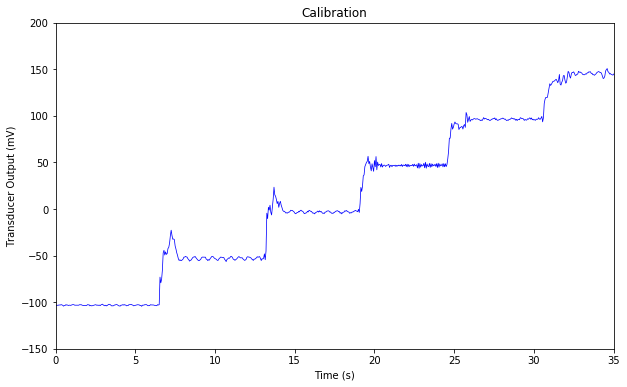

In [5]:
plotContractions(calibration, 0, 35, -150, 200, title = 'Calibration', file_name = 'uterusCalibration.jpg', save = True)

# Oxytocin

In [6]:
oxytocin = pd.read_csv('Desktop/Data_Adrienne/Uterus Data/Oxy.txt', sep = '\t',
                       header = None, error_bad_lines = False)

In [7]:
oxytocin.columns = usualCols
adjustOutput(oxytocin)
oxytocin['Time (s)'] = oxytocin['Time (s)'] / 1000
oxytocin.head()

,Time (s),Transducer Output (mV)
0,14.0,-102.4
1,15.0,-102.4
2,16.0,-102.4
3,17.0,-102.4
4,18.0,-102.4


In [8]:
test = oxytocin.iloc[62:]

test.describe()

,Time (s),Transducer Output (mV)
count,1010.000000,1010.000000
mean,518.500000,3.050307
std,291.706188,7.716276
min,14.000000,-6.440000
25%,266.250000,-2.307500
50%,518.500000,-0.275000
75%,770.750000,5.175000
max,1023.000000,26.320000


In [19]:
kwargs = {'xmin':0, 'xmax':600, 'ymin': -10, 'ymax':40, 'title':'Oxytocin Control'}

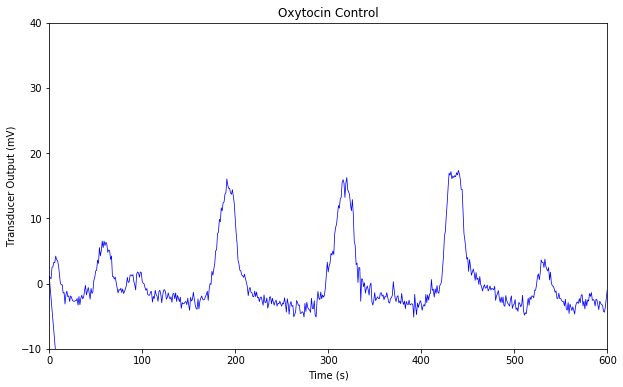

In [20]:
plotContractions(oxytocin, **kwargs, file_name='uterus_oxyControl.jpg')

In [21]:
kwargs = {'xmin':0, 'xmax':1020, 'ymin': -10, 'ymax':40, 'title':'Oxytocin Treatment'}

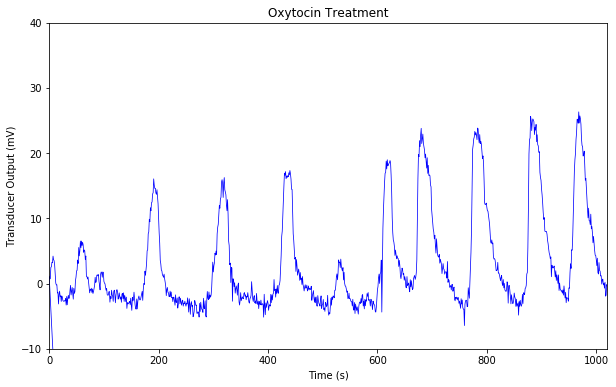

In [22]:
plotContractions(oxytocin, **kwargs, file_name='uterus_oxyTreatment.jpg')

# Acetylcholine

In [23]:
acetylcholine = pd.read_csv('Desktop/Data_Adrienne/Uterus Data/Ach.txt', sep = '\t', error_bad_lines=False, header = None)

acetylcholine.columns = usualCols

acetylcholine.head()

b'Skipping line 1978: expected 2 fields, saw 3\n'


,Time (s),Transducer Output (mV)
0,30,-0.36
1,31,-1.10
2,32,0.16
3,33,-1.01
4,34,-0.59


In [24]:
acetylcholine.describe()

,Time (s),Transducer Output (mV)
count,2477.000000,2477.000000
mean,687.735567,-4.089042
std,540.517920,9.156936
min,0.000000,-12.636000
25%,212.000000,-9.788000
50%,536.000000,-7.213000
75%,1155.000000,-1.100000
max,1775.000000,45.363000


In [25]:
kwargs = {'xmin':0, 'xmax':1020, 'ymin': -20, 'ymax':30, 'title':'Acetylcholine'}

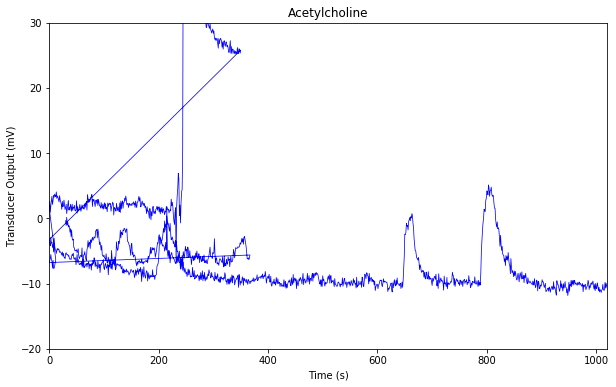

In [26]:
plotContractions(acetylcholine, **kwargs, file_name='uterus_achTest.jpg')

In [27]:
kwargs = {'xmin':600, 'xmax':1200, 'ymin': -20, 'ymax':30, 'title':'Drug Control'}

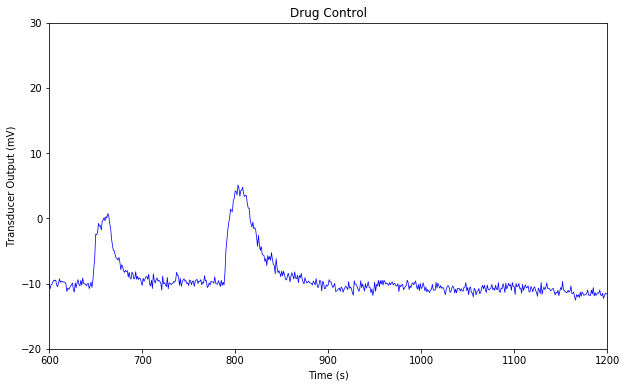

In [28]:
plotContractions(acetylcholine, **kwargs, file_name='uterus_achControl.jpg', save=True)

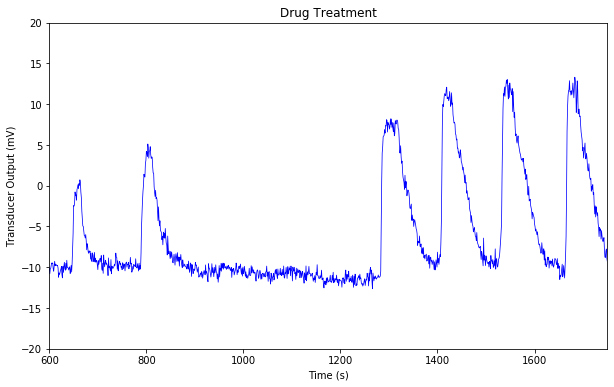

In [29]:
kwargs = {'xmin':600, 'xmax':1750, 'ymin': -20, 'ymax':20, 'title':'Drug Treatment'}

plotContractions(acetylcholine, **kwargs, file_name='uterus_achTreatment.jpg', save=True)

## Brief aside for a baseline change

In [30]:
baselineChange = acetylcholine.iloc[352:691]

In [35]:
kwargs = {'xmin':225, 'xmax':340, 'ymin': -8, 'ymax':50, 'title':'Passive Tension Changes'}

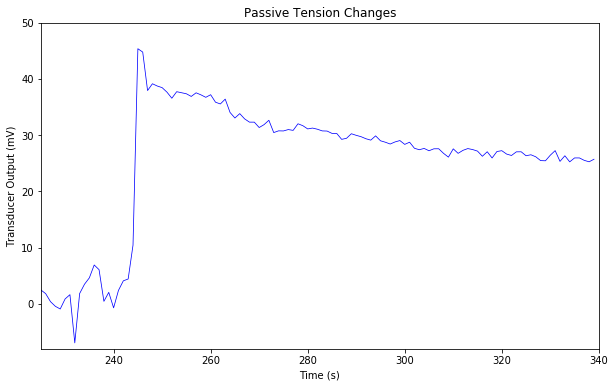

In [36]:
plotContractions(baselineChange, **kwargs, file_name='uterus_baselineChange.jpg')

# Epinephrine

In [37]:
epi = pd.read_csv('Desktop/Data_Adrienne/Uterus Data/Epi.txt', sep = '\t', error_bad_lines=False, header = None)
epi.columns = usualCols
epi.head()

b'Skipping line 484: expected 2 fields, saw 3\nSkipping line 890: expected 2 fields, saw 3\n'


,Time (s),Transducer Output (mV)
0,0,-0.311
1,1,-0.644
2,2,-0.820
3,3,-0.195
4,4,-0.745


In [38]:
epi.describe()

,Time (s),Transducer Output (mV)
count,1111.000000,1111.000000
mean,549.798380,-2.295488
std,321.510838,1.920271
min,0.000000,-5.834000
25%,271.500000,-2.962000
50%,550.000000,-2.441000
75%,827.500000,-1.952500
max,1106.000000,10.577000


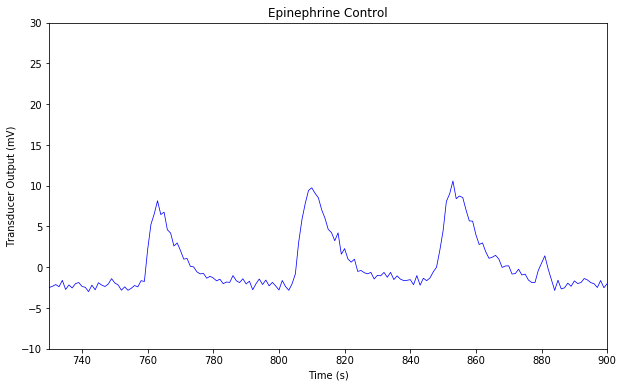

In [39]:
kwargs = {'xmin':730, 'xmax':900, 'ymin': -10, 'ymax':30, 'title':'Epinephrine Control'}

plotContractions(epi, **kwargs, file_name='uterus_epiControl.jpg')

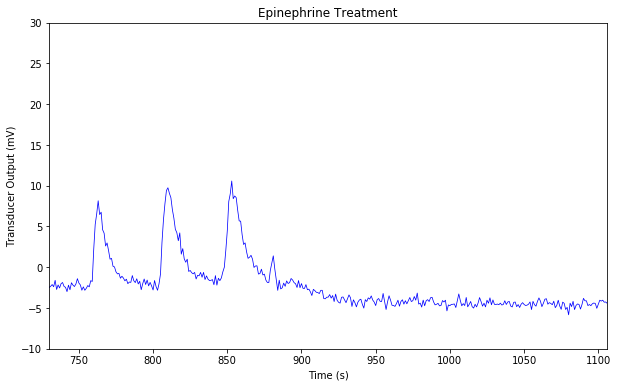

In [40]:
kwargs = {'xmin':730, 'xmax':1106, 'ymin': -10, 'ymax':30, 'title':'Epinephrine Treatment'}

plotContractions(epi, **kwargs, file_name='uterus_epiTreatment.jpg')

# Atropine

In [41]:
atropine = pd.read_csv('Desktop/Data_Adrienne/Uterus Data/Atropine + ACh.txt',
                       sep = '\t', error_bad_lines=False, header = None)
atropine.columns = usualCols
atropine.head()

b'Skipping line 11: expected 2 fields, saw 3\nSkipping line 1061: expected 2 fields, saw 3\nSkipping line 1827: expected 2 fields, saw 3\nSkipping line 2324: expected 2 fields, saw 3\n'


,Time (s),Transducer Output (mV)
0,0,-27.809
1,1,-28.475
2,2,-27.228
3,3,-28.814
4,4,-28.881


In [42]:
atropine[atropine['Transducer Output (mV)'] >= 0].describe()

,Time (s),Transducer Output (mV)
count,1109.000000,1109.000000
mean,646.572588,3.331293
std,589.703413,4.658011
min,0.000000,0.000000
25%,208.000000,0.777000
50%,452.000000,1.447000
75%,854.000000,3.333000
max,2162.000000,51.198000


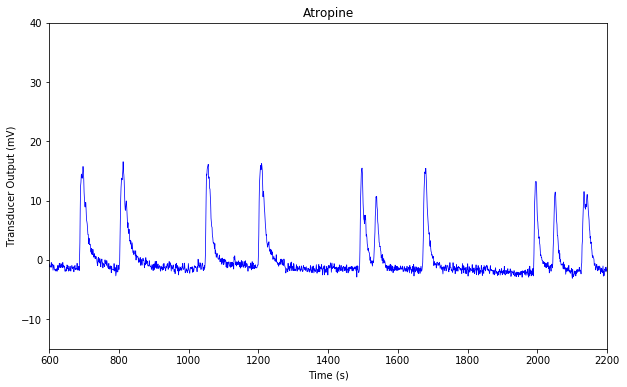

In [43]:
kwargs = {'xmin':600, 'xmax':2200, 'ymin': -15, 'ymax':40, 'title':'Atropine'}

plotContractions(atropine, **kwargs, file_name='uterus_atropineTest.jpg')

## Fake data because that is science

In [44]:
atropine[atropine['Time (s)'].isin([600, 1400])]

,Time (s),Transducer Output (mV)
1641,600,-0.700
2439,1400,-1.509


In [45]:
atropine.iloc[2439:2439 + 798, -1] = atropine.iloc[1641:2439, -1].values

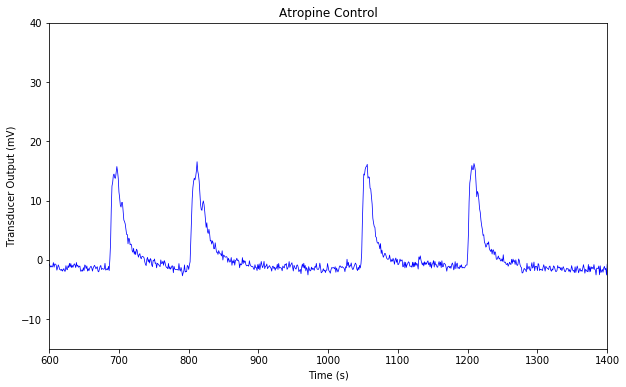

In [46]:
kwargs = {'xmin':600, 'xmax':1400, 'ymin': -15, 'ymax':40, 'title':'Atropine Control'}

plotContractions(atropine, **kwargs, file_name='uterus_atropineControl.jpg')

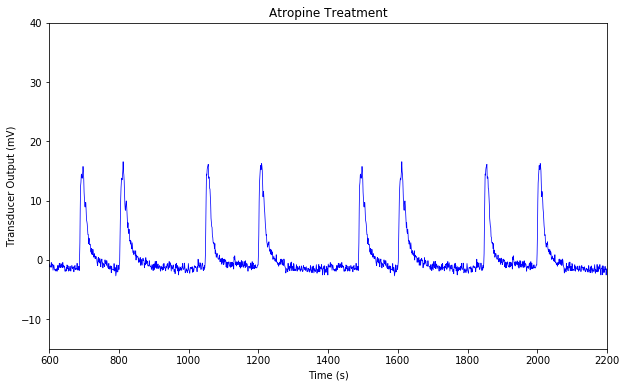

In [47]:
kwargs = {'xmin':600, 'xmax':2200, 'ymin': -15, 'ymax':40, 'title':'Atropine Treatment'}

plotContractions(atropine, **kwargs, file_name='uterus_atropineTreatment.jpg')